### import data and package

In [40]:
import pandas as pd
import numpy as np
import seaborn as sn
from collections import Counter
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

In [2]:
train=pd.read_table('traininingdata.txt',sep=";")
test=pd.read_table('testdata.txt',sep=";")

# EDA

In [3]:
train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no


### check whether there is null value

In [4]:
print(f"Train Set has {train.isnull().any().sum()} null values")
print(f"Test Set has {test.isnull().any().sum()} null values")

Train Set has 0 null values
Test Set has 0 null values


The dataset is complete without null values. Here, we treat every ``"unknown"`` value as a kind of that variable.

### check whether duplicates exist

In [5]:
print(f"Train Set has {train.duplicated().any().sum()} duplicated values")
print(f"Test Set has {test.duplicated().any().sum()} duplicated values")

Train Set has 0 duplicated values
Test Set has 0 duplicated values


### check whether the data is balanced.

In [6]:
print(f'the distribution of y in train:\n{train.y.value_counts()/len(train)}')
print(f'the distribution of y in test:\n{test.y.value_counts()/len(test)}')

the distribution of y in train:
no     0.883018
yes    0.116982
Name: y, dtype: float64
the distribution of y in test:
no     0.883003
yes    0.116997
Name: y, dtype: float64


As we can see, it's very imbalanced. The `'No'`:`'Yes'` reaches almost 9:1

### Description

In [7]:
print(train.describe(include='all'))

                 age          job  marital  education default        balance  \
count   36168.000000        36168    36168      36168   36168   36168.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         7804    21795      18556   35518            NaN   
mean       40.942076          NaN      NaN        NaN     NaN    1365.055989   
std        10.616610          NaN      NaN        NaN     NaN    3098.191637   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1422.250000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact        

In [8]:
#classify the features into continuous type(ctn) and categorical type(ctg)
ctn_features=['age', 'balance','day','duration','campaign', 'pdays', 'previous']
ctg_features=['contact', 'default', 'education', 'housing', 'job', 'loan','marital', 'month', 'poutcome']

### Visualization

#### numerical features

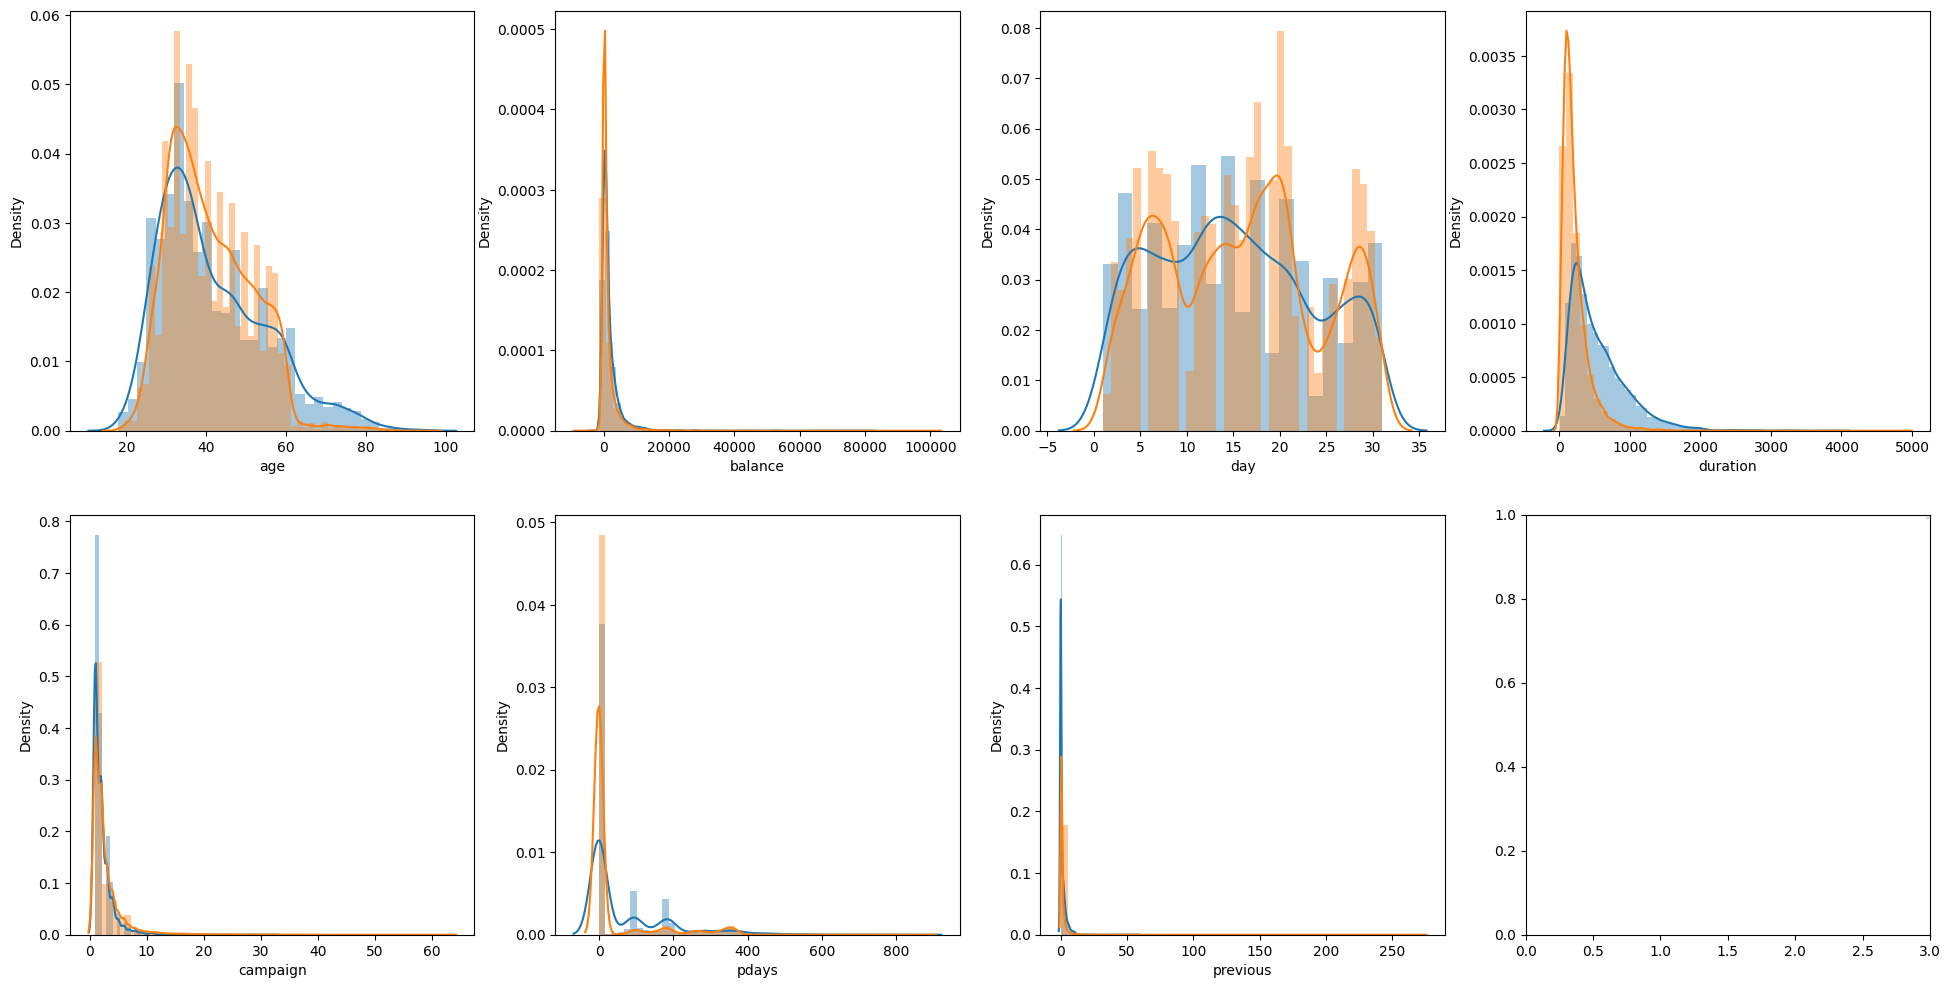

In [9]:
fig, ax = plt.subplots(2,4, figsize=(24,12))
for i in range(len(ctn_features)):
    #sn.kdeplot(x=ctn_features[i],hue='y',shade=True,data=train,ax=ax[i//4][i%4])
    sn.distplot(train[ctn_features[i]][train.y=='yes'],hist = True, kde = True,ax=ax[i//4][i%4])
    sn.distplot(train[ctn_features[i]][train.y=='no'],hist=True,kde=True,ax=ax[i//4][i%4])
    plt.legend(['yes', 'no'],prop={'size':2})
    plt.xlim([train[ctn_features[i]].quantile(0.001),train[ctn_features[i]].quantile(0.95)])
# plt.savefig("ctn_featr.png", dpi=750, bbox_inches = 'tight')#transparent=True

look into interesting variables:

- age

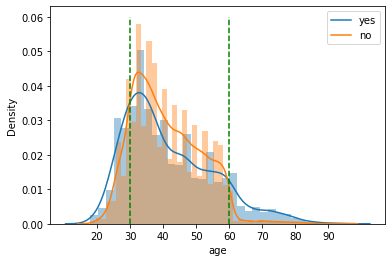

In [17]:
sn.distplot(train['age'][train.y=='yes'],hist = True, kde = True)
sn.distplot(train['age'][train.y=='no'],hist=True,kde=True)
plt.legend(['yes', 'no'])
plt.xticks([20,30,40,50,60,70,80,90])
plt.vlines(30,0,0.06,ls='dashed',color='g')
plt.vlines(60,0,0.06,ls='dashed',color='g')
plt.savefig("age_distr.png", dpi=750, bbox_inches = 'tight')#transparent=True

we can see that when `age` > 60 or `age` < 30 , the tail of `yes` is thicker than `no`. It means that the elders and the youth tend to buy the product, which seems reasonable because the two groups are more persuassive. 

Thus, we can divide `age` into < 30, 30 to 60, >60 three subgroups.

- duration

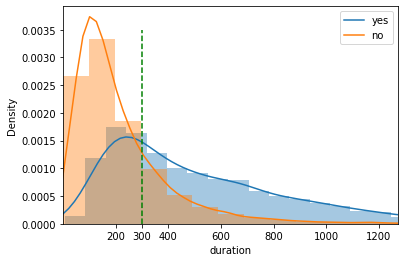

In [18]:
sn.distplot(train['duration'][train.y=='yes'],hist = True, kde = True)
sn.distplot(train['duration'][train.y=='no'],hist=True,kde=True)
plt.xlim([0,train.duration.quantile(0.99)])
plt.legend(['yes', 'no'])
plt.vlines(300,0,0.0035,color='g',ls='dashed')
plt.xticks([200,300,400,600,800,1000,1200])
plt.savefig("duration_distr.png", dpi=750, bbox_inches = 'tight')#transparent=True

For `duration`, we can divide it to <300, 300 to 600, > 600 three subgroups.

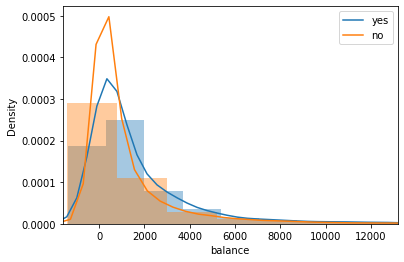

In [19]:
sn.distplot(train['balance'][train.y=='yes'],hist = True, kde = True)
sn.distplot(train['balance'][train.y=='no'],hist=True,kde=True)
plt.xlim([train['balance'].quantile(0.001),train['balance'].quantile(0.99)])
plt.legend(['yes', 'no'])
#plt.vlines(300,0,0.0035,color='g',ls='dashed')
#plt.xticks([200,300,400,600,800,1000,1200])
#plt.savefig("duration_distr.png", dpi=750, bbox_inches = 'tight')#transparent=True

the distributions are largely overlapped, we may consider the `balance` feature not so helpful.

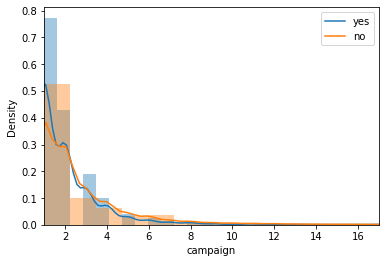

In [20]:
sn.distplot(train['campaign'][train.y=='yes'],hist = True, kde = True)
sn.distplot(train['campaign'][train.y=='no'],hist=True,kde=True)
plt.xlim([train.campaign.quantile(0.01),train.campaign.quantile(0.99)])
plt.legend(['yes', 'no'])

the distributions are largely overlapped, we may consider the `campaign` feature not so helpful.

(0.0, 7.0)

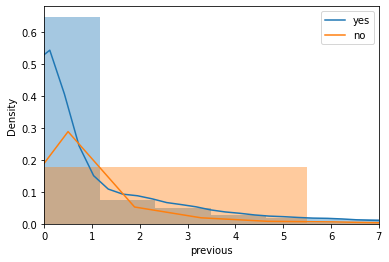

In [33]:
vrname='previous'
sn.distplot(train[vrname][train.y=='yes'],hist=True,kde=True)
sn.distplot(train[vrname][train.y=='no'],hist=True,kde=True)
#plt.xlim([train[vrname].quantile(0),train[vrname].quantile(0.99)])
plt.legend(['yes', 'no'])
plt.xlim(0,7)

For numerical variable, we find that `age`,`duration` have different distributions between `yes` and `no` two groups. However, the other 5 features seem to have similar distributions between the two groups. Then, we try to divide `age` and `duration` into subgroups.

#### categorical features

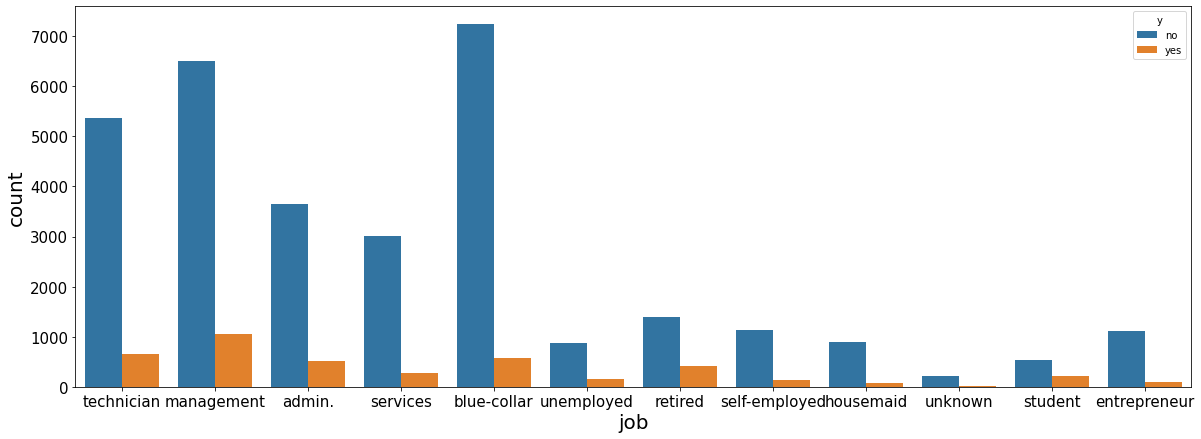

In [34]:
plt.figure(figsize=(20, 7))
sn.countplot(x='job',hue='y',data=train)
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('job',fontdict={'size':20})
plt.ylabel('count',fontdict={'size':20})
plt.savefig("job.png", dpi=750, bbox_inches = 'tight')

In [35]:
train.groupby('job').apply(lambda x:sum(x.y=='yes')/sum(x.y=='no')).sort_values(axis=0)

job
blue-collar      0.078645
housemaid        0.090100
entrepreneur     0.090909
services         0.094496
unknown          0.120773
technician       0.123114
self-employed    0.126095
admin.           0.142426
management       0.162383
unemployed       0.184807
retired          0.298497
student          0.392193
dtype: float64

We find that the `retired` and `student` tend to buy the product, which seems reasonable because they want to deposit money. The `blue-collar` is least favorite a deposit product. 

According to the ratio of `yes`:`no`, we can divide job into 4 subgroups,which are:`{'low_level':('blue-collar','housemaid','entrepreneur','services'), 'mid_level':('unknown','technician','self-employed','admin.'),'advanced_level':('management','unemployed'),'high_level':('retired','student')}`

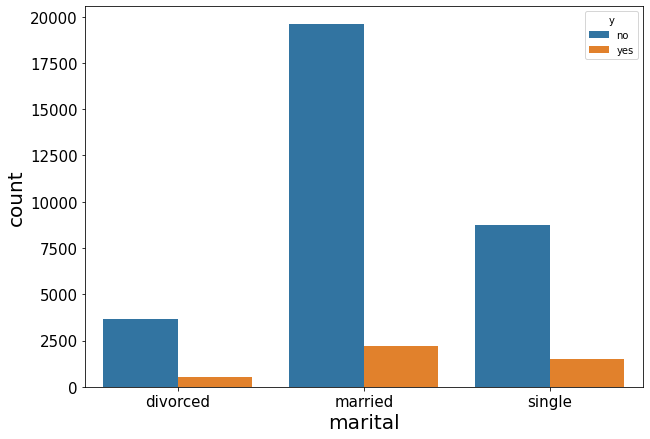

In [36]:
vrname='marital'
plt.figure(figsize=(10, 7))
sn.countplot(x=vrname,hue='y',data=train)
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel(vrname,fontdict={'size':20})
plt.ylabel('count',fontdict={'size':20})
plt.savefig(vrname+".png", dpi=750, bbox_inches = 'tight')

# Feature Engineering

- age

In [10]:
def age_to_categorical(data,age):
    age_group=pd.cut(age,bins=[0,25,40,60,100],labels=['<25','25-40','40-60','>60'])
    #inserting the age group after age and deleting it
    data.insert(0,'age_group',age_group)
    #dropping age column
    data.drop('age',axis=1,inplace=True)
    
    return data

- Duration

In [11]:
def duration_to_categorical(data,duration):
    duration_group=pd.cut(duration,bins=[0,300,600,5000],labels=['<300','300-600','>600'])
    #inserting the age group after age and deleting it
    data.insert(0,'duration_group',duration_group)
    #dropping age column
    data.drop('duration',axis=1,inplace=True)
    return data

- job

In [12]:
sort_job=train.groupby('job').apply(lambda x:sum(x.y=='yes')/sum(x.y=='no')).sort_values(axis=0)
sort_job

job
blue-collar      0.078645
housemaid        0.090100
entrepreneur     0.090909
services         0.094496
unknown          0.120773
technician       0.123114
self-employed    0.126095
admin.           0.142426
management       0.162383
unemployed       0.184807
retired          0.298497
student          0.392193
dtype: float64

In [13]:
low_level=tuple(sort_job[:4].index.values)
mid_level=tuple(sort_job[4:8].index.values)
advanced_level=tuple(sort_job[8:10].index.values)
high_level=tuple(sort_job[10:].index.values)
dict_levels={low_level:'low_level',mid_level:'mid_level',advanced_level:'advanced_level',high_level:'high_level'}

In [14]:
def job_to_subg(data):
    data.replace({'job':low_level},'low_level',inplace=True)
    data.replace({'job':mid_level},'mid_level',inplace=True)
    data.replace({'job':advanced_level},'advanced_level',inplace=True)
    data.replace({'job':high_level},'high_level',inplace=True)
    return data

- remove outliers of compaign

In [15]:
def compaign_outlier(df):
    # for yes class
    Q1 = df[df.y == 'yes'].campaign.quantile(0.25)
    Q3 = df[df.y == 'yes'].campaign.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (((df.campaign < (Q1 - 1.5 * IQR)) |(df.campaign > (Q3 + 1.5 * IQR))) & (df.y == 'yes'))
    df = df[~filter]

    # for no class
    Q1 = df[df.y == 'no'].campaign.quantile(0.25)
    Q3 = df[df.y == 'no'].campaign.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (((df.campaign < (Q1 - 1.5 * IQR)) |(df.campaign > (Q3 + 1.5 * IQR))) & (df.y == 'no'))
    df = df[~filter]
    
    return df

- pdays

In [16]:
def pdays_0(data):
    data.replace({'pdays':-1},0,inplace=True)
    return data

In [17]:
def ftr_eng(data):
    data=age_to_categorical(data,data.age)
    data=duration_to_categorical(data,data.duration)
    data=job_to_subg(data)
    #data=compaign_outlier(data)
    data=pdays_0(data)
    return data

In [18]:
train=ftr_eng(train)
test=ftr_eng(test)

### Encoding

In [19]:
numeric_attrs = ['balance','day','campaign','pdays','previous']
bin_attrs = ['y','default','housing','loan']
cate_onehattrs = ['age_group','duration_group','job','marital','contact','poutcome']
cate_orderattrs=['education','month']

- binary

In [20]:
def encode_bin_attrs(data,bin_attrs):    
    for i in bin_attrs:
        data[i]=LabelEncoder().fit_transform(data[i])
    return data

- one-hot encoding

In [21]:
def encode_onehot_attrs(data,cate_onehattrs):
    for ftr in cate_onehattrs:
        data=pd.concat([data,pd.get_dummies(data[ftr],prefix=ftr)],axis=1)
    data=data.drop(columns=cate_onehattrs)
    return data

- ordinal encoding

In [22]:
def encode_edu_attrs(data):
    values = ['unknown','primary', 'secondary', 'tertiary']
    levels = range(0,len(values))
    dict_levels = dict(zip(values, levels))
    for v in values:
        data.loc[data['education'] == v, 'education'] = dict_levels[v]
    return data

def encode_month_attrs(data):
    values = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    levels = range(1,len(values)+1)
    dict_levels = dict(zip(values, levels))
    for v in values:
        data.loc[data['month'] == v, 'month'] = dict_levels[v]
    return data

In [23]:
def encode(data,bin_attrs,cate_onehattrs):
    data=encode_bin_attrs(data,bin_attrs)
    data=encode_onehot_attrs(data,cate_onehattrs)
    data=encode_edu_attrs(data)
    data=encode_month_attrs(data)
    return data

In [24]:
train=encode(train,bin_attrs,cate_onehattrs)
test=encode(test,bin_attrs,cate_onehattrs)

### split train and validation

In [25]:
train_data,valid_data=train_test_split(train,stratify=train['y'],test_size=0.2,random_state=1)
test_data=test

In [26]:
x_train,y_train=train_data.drop(columns='y'),train_data['y']
x_valid,y_valid=valid_data.drop(columns='y'),valid_data['y']
x_test,y_test=test_data.drop(columns='y'),test_data['y']

# Feature Scaling

In [27]:
scaler=StandardScaler().fit(x_train) 
def stdscl(data,scaler):
    data=scaler.transform(data)
    return data


In [28]:
x_train[:]=stdscl(x_train,scaler)
x_valid[:]=stdscl(x_valid,scaler)
x_test[:]=stdscl(x_test,scaler)

# Resampling

In [31]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.6,random_state=1)
x_train_SMOTE, y_train_SMOTE = smote.fit_resample(x_train, y_train)

# 3.1 Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

RFCls = RandomForestClassifier(n_estimators=400, random_state=5101)
RFCls.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=5101)

In [66]:
RFPrediction = RFCls.predict_proba(x_test)
RFPrediction = (RFPrediction[:,1] > 0.5).astype('int')

In [67]:
x_train.head()

,education,default,balance,housing,loan,day,month,campaign,pdays,previous,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
11351,-0.078510,-0.13435,-0.440744,-1.116279,-0.437140,1.470354,0.771061,-0.563189,-0.409496,-0.234003,...,-0.358858,0.812763,-0.629358,0.738772,-0.262484,-0.636964,-0.344651,-0.207467,-0.188026,0.471036
29555,1.205608,-0.13435,-0.440098,0.895833,-0.437140,0.508716,-0.061661,0.069454,-0.409496,-0.234003,...,-0.358858,0.812763,-0.629358,-1.353597,-0.262484,1.569947,-0.344651,-0.207467,-0.188026,0.471036
28083,-1.362627,-0.13435,0.231626,0.895833,-0.437140,1.830968,0.354700,5.763246,-0.409496,-0.234003,...,-0.358858,0.812763,-0.629358,0.738772,-0.262484,-0.636964,-0.344651,-0.207467,-0.188026,0.471036
16721,-1.362627,-0.13435,-0.481171,0.895833,-0.437140,-1.294355,-0.478023,-0.563189,-0.409496,-0.234003,...,2.786615,-1.230372,-0.629358,0.738772,-0.262484,-0.636964,-0.344651,-0.207467,-0.188026,0.471036
4925,1.205608,-0.13435,4.665582,-1.116279,2.287595,-1.534765,-0.061661,0.069454,-0.409496,-0.234003,...,-0.358858,0.812763,-0.629358,0.738772,-0.262484,-0.636964,-0.344651,-0.207467,-0.188026,0.471036


In [68]:
precision_score(y_test, RFPrediction)

0.5803183791606368